# Chapter 3 ノルムと距離

## 3.1 ノルム

### ノルム

ノルム$\| x \|$はJuliaでは`norm(x)`と書く（他にも書き方はあるが）．関数`norm`はJuliaの`LinearAlgebra`パッケージに含まれているので，使う前にインストールする必要がある（ページ＊＊参照）．

In [1]:
x = [ 2, -1, 2 ];
using LinearAlgebra
norm(x)

3.0

In [4]:
sqrt(x' * x)

3.0

In [5]:
sqrt(sum(x .^ 2))

3.0

### 三角不等式

$x$と$y$に値を入れて，三角不等式$\| x + y \| \le \| x \| + \| y \|$をチェックしよう．

In [6]:
x = randn(10); 
y = randn(10);

lhs = norm(x+y)

4.229571133020596

In [7]:
rhs = norm(x) + norm(y)

6.55529295639162

# RMS

ベクトルのRMSは$\mathbf{rms}(x) = \| x \| / \sqrt{n}$である．これはJuliaでは`norm(x)/sqrt(length(x))`となる（`VMSLS`パッケージにはこの関数が含まれているので，パッケージをインストールすると使える）．

あるベクトル（これは信号，つまり時間的に等間隔にサンプリングされた値であるとする）に対してRMSを求めよう．以下のコードは信号，平均値，2つの定数$\mathbf{avg}(x) \pm \mathbf{rms}(x)$をプロットする（図3.1）．

In [10]:
using VMLS, Plots

rms(x) = norm(x) / sqrt(length(x));
t = 0:0.01:1;  # 時刻のリスト
x = cos.(8 * t) - 2 * sin.(11 * t);
avg(x)

-0.04252943783238692

In [11]:
rms(x)

1.0837556422598

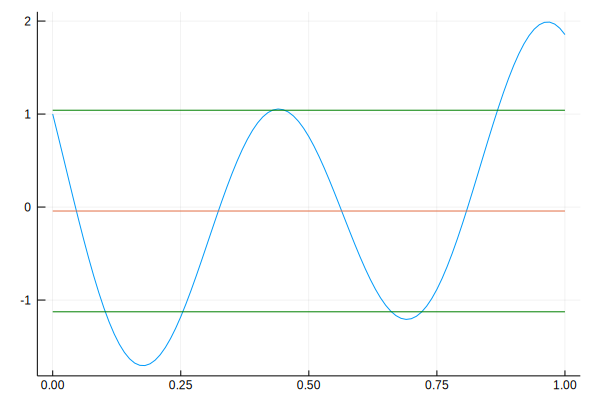

In [12]:
plot(t, x)
plot!(t, avg(x) * ones(length(x)))
plot!(t, (avg(x) + rms(x)) * ones(length(x)), color = :green)
plot!(t, (avg(x) - rms(x)) * ones(length(x)), color = :green)
plot!(legend = false)

![図3.1](fig3-1.pdf)

図3.1 信号$x$．3本の横線はそれぞれ$\mathbf{avg}(x) + \mathbf{rms}(x)$，$\mathbf{avg}(x)$，$\mathbf{avg}(x) - \mathbf{rms}(x)$である．

### チェビシェフの不等式

チェビシェフの不等式は，$n$次元ベクトル$x$について，絶対値が$a$以上である要素の個数は$\| x \|^2 / a^2 = n \ \mathbf{rms}(x)^2 / a^2$以下である，ということを示している．もしこの値（上界）がたとえば12.15であれば，絶対値が$a$以上である要素は12個以下である，と結論できる．要素の数は整数なので，チェビシェフの不等式の上界は，$\mathrm{floor}(\| x \|^2 / a^2)$に改善できる．ここで$\mathrm{floor}$は小数部分を切り捨てる関数である．このfloor関数を用いるチェビシェフの上界を関数で定義し，ある$a$について，先程の信号に適用してみよう．

In [13]:
# チェビシェフの上界
cheb_bound(x,a) = floor(norm(x)^2 / a^2);
a = 1.5;
cheb_bound(x,a)

52.0

In [14]:
# |x_i| >= a であるxの要素数
sum(abs.(x) .>= a)

20

最後の行の式`abs.(x) .>= a`は，`x`の各要素がその不等式を満たすかどうかの真偽値（`true`または`false`）の配列になる．真偽値のベクトルの総和を計算するときには，真偽値は自動的に1と0に変換される．

## 3.2 距離

### 距離

2つのベクトル間の距離は$\mathbf{dist}(x, y) = \| x - y \|$である．これをJuliaで書くと`norm(x-y)`となる．本書＊＊＊ページに登場する3つのベクトル$u, v, w$のペアの距離を求めよう．

In [15]:
u = [1.8, 2.0, -3.7, 4.7];
v = [0.6, 2.1, 1.9, -1.4];
w = [2.0, 1.9, -4.0, 4.6];
norm(u - v), norm(u - w), norm(v - w)

(8.36779540858881, 0.3872983346207417, 8.532877591996735)

これから分かるように，$u$と$v$の距離，$v$と$w$の距離よりも，$u$と$w$との距離が最も短い．

### 最近傍

以下のコードは，ベクトルのリストから，与えられたベクトルに最も近いものを求める関数を定義し，本書の図3.3の点に適用している．

In [17]:
nearest_neighbor(x,z) = z[ argmin([norm(x - y) for y in z]) ];
z = ( [2,1], [7,2], [5.5,4], [4,8], [1,5], [9,6] );
nearest_neighbor([5,6], z)

2-element Array{Float64,1}:
 5.5
 4.0

In [18]:
nearest_neighbor([3,3], z)

2-element Array{Int64,1}:
 2
 1

第1行目の式`[norm(x-y) for y in z]`は，Juliaの便利な表記法を用いている．ここで`z`はベクトルのリストであり，この式は要素が`norm(x-z[1]), norm(x-z[2]), ...`である配列になる．`argmin`関数をこの配列に適用して，最小の要素のインデックスを得ている．

### ベクトルの平均除去

ベクトル$x - \mathbf{avg}(x) \boldsymbol{1}$は，ベクトル$x$の各要素から平均を引いたものである．


In [19]:
de_mean(x) = x .- avg(x);  # 平均除去関数
x = [1, -2.2, 3];

avg(x)

0.6

In [20]:
x_tilde = de_mean(x)

3-element Array{Float64,1}:
  0.4               
 -2.8000000000000003
  2.4               

In [21]:
avg(x_tilde)

-1.4802973661668753e-16

（$\tilde{x}$の平均は非常にゼロに近い）

## 3.3 標準偏差

### 標準偏差

本書でのベクトルの標準偏差の定義は$\mathbf{std}(x) = \| x - \mathbf{avg}(x) \boldsymbol{1} \| / \sqrt{n}$である．ここで$n$はベクトルの長さである．これに対応する関数も定義できる．

In [24]:
x = rand(100);

# VMLSパッケージのstdの定義
stdev(x) = norm(x .- avg(x)) / sqrt(length(x));
stdev(x)

0.27755075174252414

この関数は`VMLS`パッケージにあるので，そのパッケージをインストールすれば使える（なおJuliaの`Statistics`にも`std(x)`という同じような関数があるが，こちらは$\| x - \mathbf{avg}(x) \boldsymbol{1} \| / \sqrt{n-1}$を計算するものである）．

### リターンとリスク

本書の図3.4に登場する2つの時系列の平均リターンと（標準偏差で測る）リスクを求めよう．

In [25]:
a = ones(10);
avg(a), stdev(a)

(1.0, 0.0)

In [26]:
b = [ 5, 1, -2, 3, 6, 3, -1, 3, 4, 1 ];
avg(b), stdev(b)

(2.3, 2.41039415863879)

In [27]:
c = [ 5, 7, -2, 2, -3, 1, -1, 2, 7, 8 ];
avg(c), stdev(c)

(2.6, 3.773592452822641)

In [28]:
d = [ -1, -3, -4, -3, 7, -1, 0, 3, 9, 5 ];
avg(d), stdev(d)

(1.2, 4.308131845707603)

### ベクトルの標準化

ベクトルの要素がすべて同じ値でなければ，平均を引いて標準偏差で割れば，標準化できる．標準化されたベクトルは，平均がゼロでRMSは1である．その要素はzスコアと呼ばれている．では標準化関数を定義して，ランダムなベクトルで確認してみよう．

In [29]:
function standardize(x)
x_tilde = x .- avg(x)  # 平均除去ベクトル
return x_tilde / rms(x_tilde)
end

standardize (generic function with 1 method)

In [30]:
x = rand(100);
avg(x), rms(x)

(0.4787430112155901, 0.5479834196286111)

In [31]:
z = standardize(x);
avg(z), rms(z)

(-3.7081449022480227e-16, 1.0000000000000002)

標準化されたベクトル`z`の平均はほぼゼロである．


## 3.4 角度

### 角度

2つのベクトルのなす角を求める関数を定義する．ただし`angle`という関数はすでにJuliaにあるので（これは複素数の位相を計算する），この関数の名前は`ang`にしよう．

In [32]:
# 角度を返す関数の定義．返り値の単位はラジアン
ang(x, y) = acos(x' * y / (norm(x) * norm(y)));

In [33]:
a = [1, 2, -1];
b = [2, 0, -3];
ang(a,b)

0.9689825515916383

In [34]:
ang(a, b) * (360 / (2 * pi))  # 角度を度に変換

55.51861062801842

### 相関係数

（標準偏差がゼロではない）2つのベクトル$a$と$b$の間の相関係数の定義は次式である．
$$
\rho = \frac{\tilde{a}^T \tilde{b}}{\| \tilde{a} \| \| \tilde{b} \|}
$$
ここで$\tilde{a}$と$\tilde{b}$はそれぞれ$a$と$b$の平均除去ベクトルである．相関係数を求める組み込み関数はないため，ここで定義する．それを使って，本書図3.8の3つのベクトルペアの相関係数を計算しよう．

In [35]:
function correl_coef(a,b)
a_tilde = a .- avg(a)
b_tilde = b .- avg(b)
return (a_tilde' * b_tilde) / (norm(a_tilde) * norm(b_tilde))
end

correl_coef (generic function with 1 method)

In [36]:
a = [4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -0.6, 7.4];
b = [6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2];
correl_coef(a,b)

0.9678196342570434

In [37]:
a = [4.1, 10.1, 15.1, 13.1, 7.1, 2.1, -2.9, -5.9, 0.1, 7.1];
b = [5.5, -0.5, -4.5, -3.5, 1.5, 7.5, 13.5, 14.5, 11.5, 4.5];
correl_coef(a,b)

-0.9875211120643734

In [38]:
a = [-5.0, 0.0, 5.0, 8.0, 13.0, 11.0, 1.0, 6.0, 4.0, 7.0];
b = [5.8, 0.8, 7.8, 9.8, 0.8, 11.8, 10.8, 5.8, -0.2, -3.2];
correl_coef(a,b)

0.004020976661367021

3つのベクトルペアの相関係数はそれぞれ$96.8\%$, $-98.8\%$, $0.4\%$である．

### 計算時間

$n$次元ベクトルの相関係数の計算時間がほぼ$n$に線形に比例することを確認してみよう．

In [51]:
x = randn(10^6);
y = randn(10^6);

In [52]:
@time correl_coef(x, y);

  0.028312 seconds (9 allocations: 15.259 MiB, 68.84% gc time)


In [53]:
@time correl_coef(x, y);

  0.026049 seconds (9 allocations: 15.259 MiB, 12.33% gc time)


In [54]:
x = randn(10^7);
y = randn(10^7);

In [55]:
@time correl_coef(x, y);

  0.205272 seconds (9 allocations: 152.588 MiB, 66.45% gc time)


In [56]:
@time correl_coef(x, y);

  0.195542 seconds (9 allocations: 152.588 MiB, 63.39% gc time)
